# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print('azias', azdias.shape)
azdias.head(n=10)

azias (891221, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [4]:
print('feat_info', feat_info.shape)


feat_info (85, 4)


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [5]:
# Identify missing or unknown data values and convert them to NaNs.
def transform_list_value(row):
    missing_or_unknown_as_str = str(row['missing_or_unknown']).strip()[1: -1]
    if not missing_or_unknown_as_str:
        return []
    return [val.strip() for val in missing_or_unknown_as_str.split(',')]

feat_info['missing_or_unknown_as_list'] = feat_info.apply(transform_list_value, axis=1)
missing_or_unknown_map = dict(feat_info[['attribute', 'missing_or_unknown_as_list']].values)
for nan_values in missing_or_unknown_map.values():
    for i in range(len(nan_values)):
        try:
            nan_values[i] = int(nan_values[i])
        except:
            pass
missing_or_unknown_map = {attr: nan_values for attr, nan_values in missing_or_unknown_map.items() if nan_values}


In [6]:
azdias = azdias.replace(missing_or_unknown_map, np.NaN)

In [7]:
azdias.head(n=10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

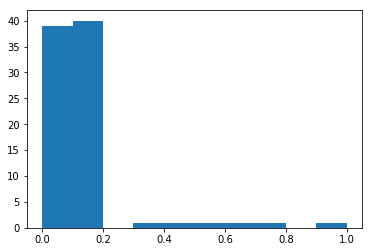

In [8]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing_value_count_col_wise = azdias.isnull().sum()
missing_value_pct_col_wise = missing_value_count_col_wise / azdias.shape[0]
n, bins, patches = plt.hist(missing_value_pct_col_wise)

In [9]:
for index, row in missing_value_count_col_wise.to_frame().iterrows():
    print('%25s has %6d nan values' % (index, row[0]))
missing_value_count_col_wise.to_frame().describe()

                 AGER_TYP has 685843 nan values
     ALTERSKATEGORIE_GROB has   2881 nan values
                ANREDE_KZ has      0 nan values
            CJT_GESAMTTYP has   4854 nan values
        FINANZ_MINIMALIST has      0 nan values
            FINANZ_SPARER has      0 nan values
         FINANZ_VORSORGER has      0 nan values
           FINANZ_ANLEGER has      0 nan values
    FINANZ_UNAUFFAELLIGER has      0 nan values
         FINANZ_HAUSBAUER has      0 nan values
                FINANZTYP has      0 nan values
              GEBURTSJAHR has 392318 nan values
          GFK_URLAUBERTYP has   4854 nan values
         GREEN_AVANTGARDE has      0 nan values
               HEALTH_TYP has 111196 nan values
      LP_LEBENSPHASE_FEIN has  97632 nan values
      LP_LEBENSPHASE_GROB has  94572 nan values
          LP_FAMILIE_FEIN has  77792 nan values
          LP_FAMILIE_GROB has  77792 nan values
           LP_STATUS_FEIN has   4854 nan values
           LP_STATUS_GROB has   4854 nan

,0
count,85.000000
mean,98516.811765
std,146604.203317
min,0.000000
25%,0.000000
50%,93148.000000
75%,116515.000000
max,889061.000000


In [10]:
# Investigate patterns in the amount of missing data in each column.
acc_count = 0
total_count = azdias.shape[1]
for index, bin_count in enumerate(n):
    acc_count += bin_count
    print('Bin %2d has count value %2d, accounting for %3f %% number of atrributes' \
          % (index + 1, bin_count, acc_count * 100 / total_count))


Bin  1 has count value 39, accounting for 45.882353 % number of atrributes
Bin  2 has count value 40, accounting for 92.941176 % number of atrributes
Bin  3 has count value  0, accounting for 92.941176 % number of atrributes
Bin  4 has count value  1, accounting for 94.117647 % number of atrributes
Bin  5 has count value  1, accounting for 95.294118 % number of atrributes
Bin  6 has count value  1, accounting for 96.470588 % number of atrributes
Bin  7 has count value  1, accounting for 97.647059 % number of atrributes
Bin  8 has count value  1, accounting for 98.823529 % number of atrributes
Bin  9 has count value  0, accounting for 98.823529 % number of atrributes
Bin 10 has count value  1, accounting for 100.000000 % number of atrributes


In [11]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

max_allowed_pct = bins[2]  # deducted from the histogram
drop_columns = missing_value_pct_col_wise[missing_value_pct_col_wise > max_allowed_pct].index.tolist()
print('Columns to be dropped:', ', '.join(drop_columns))

azdias_drop_nan_columns = azdias.drop(drop_columns, axis=1)
azdias_drop_nan_columns.shape

Columns to be dropped: AGER_TYP, GEBURTSJAHR, TITEL_KZ, ALTER_HH, KK_KUNDENTYP, KBA05_BAUMAX


(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

- Detailed missing or unknownn value count in each column can be seen in the printing above
- For missing value count: maximum number of missing value in one column is 889061 (column 'TITEL_KZ') and mean value of missing value count is 98517
- Majority of the columns have less than 20% of missing values, accounting for 92% number of available columns
- Based on these information, all columns with more than 20% missing values are drops and they are: AGER_TYP, GEBURTSJAHR, TITEL_KZ, ALTER_HH, KK_KUNDENTYP, KBA05_BAUMAX

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

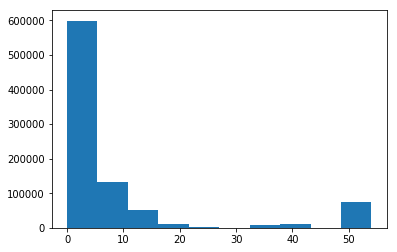

In [12]:
# How much data is missing in each row of the dataset?
missing_value_count_row_wise = azdias.isnull().sum(axis=1)
n, bins, patches = plt.hist(missing_value_count_row_wise)

** From the histogram above, we can take the points in the first 2 bins with about less than 10 missing values in the row **

In [13]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
max_allowed_missing_count_in_row = bins[2]

less_missing_row_indices = missing_value_count_row_wise[missing_value_count_row_wise <= max_allowed_missing_count_in_row].index
more_missing_row_indices = missing_value_count_row_wise[missing_value_count_row_wise > max_allowed_missing_count_in_row].index

less_missing_rows = azdias.loc[less_missing_row_indices, :]
more_missing_rows = azdias.loc[more_missing_row_indices, :]


In [14]:
# preparation: find 5 columns with least number of missing values
least_missing_columns = missing_value_count_col_wise.sort_values()[:5].index.tolist()
least_missing_columns

['ZABEOTYP', 'SEMIO_TRADV', 'SEMIO_PFLICHT', 'SEMIO_KAEM', 'SEMIO_DOM']

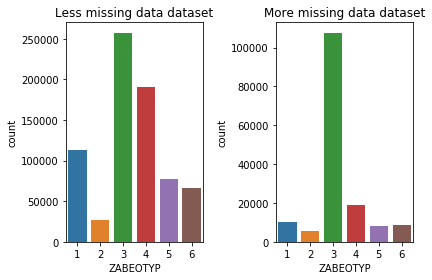

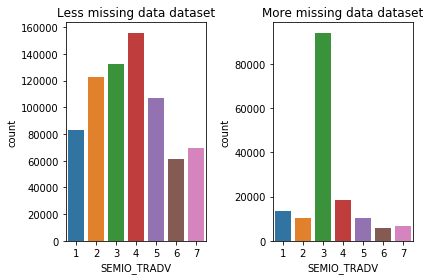

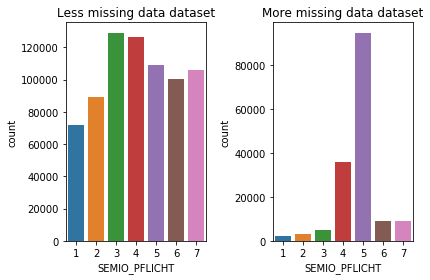

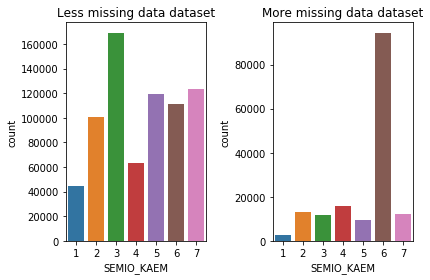

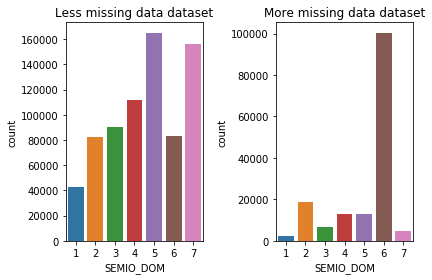

In [15]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def evaluate_column_distribution(colname):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    sns.countplot(x=colname, data=less_missing_rows, ax=ax1).set_title('Less missing data dataset')
    sns.countplot(x=colname, data=more_missing_rows, ax=ax2).set_title('More missing data dataset')
    fig.tight_layout()

# evaluate_column_distribution('ZABEOTYP')
for col in least_missing_columns:
    evaluate_column_distribution(col)

In [16]:
# only keep row with no missing values
azdias_drop_na = azdias_drop_nan_columns.dropna()

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

- From the plots comparing two distribution behaviour of 2 datasets, it can be observed for all selected columns (column with no missing values), the distribution of values varies significantly
- The distribution in the dataset with less missing values are more 'even' while in the dataset with more missing values, there is a dominating value with noticeable more number of counts

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [17]:
# How many features are there of each data type?
feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [18]:
# utility function
def get_columns_of_type(type_name):
    return feat_info[feat_info.type == type_name]['attribute'].tolist()


In [19]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical_columns = get_columns_of_type('categorical')
binary_columns = []
multi_level_columns = []
for column in categorical_columns:
    if column not in azdias_drop_na.columns:
        continue
    print('----')
    print(azdias_drop_na[column].value_counts())
    if azdias_drop_na[column].nunique() <= 2:
        binary_columns.append(column)
    else:
        multi_level_columns.append(column)


----
2    318591
1    304618
Name: ANREDE_KZ, dtype: int64
----
4.0    160908
3.0    119004
2.0    113203
5.0     79854
6.0     77273
1.0     72967
Name: CJT_GESAMTTYP, dtype: int64
----
6    240292
1    146234
5     88119
2     79302
4     44630
3     24632
Name: FINANZTYP, dtype: int64
----
12.0    98076
10.0    81624
8.0     69405
11.0    60164
5.0     57326
4.0     51615
3.0     44233
9.0     41272
1.0     39929
7.0     31423
2.0     27430
6.0     20712
Name: GFK_URLAUBERTYP, dtype: int64
----
0    476988
1    146221
Name: GREEN_AVANTGARDE, dtype: int64
----
1.0     325104
10.0    108290
2.0      80801
11.0     41248
8.0      16764
7.0      14077
4.0       9174
5.0       9123
9.0       8831
6.0       6211
3.0       3586
Name: LP_FAMILIE_FEIN, dtype: int64
----
1.0    325104
5.0    158369
2.0     80801
4.0     37052
3.0     21883
Name: LP_FAMILIE_GROB, dtype: int64
----
1.0     175564
9.0      97350
10.0     93471
2.0      81016
3.0      58334
4.0      58008
6.0      23303
5.0      

In [20]:
# Re-encode categorical variable(s) to be kept in the analysis.

# from the result of previous cell, the binary column with non-numeric value is OST_WEST_KZ
azdias_drop_na = azdias_drop_na.replace({'OST_WEST_KZ': {'W': 0, 'O': 1}})

# one-hot encode other multiple level categorical columns
azdias_drop_na = pd.get_dummies(azdias_drop_na, columns=multi_level_columns)


In [21]:
binary_columns

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [22]:
multi_level_columns

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

- the dataset we perform the categorical feature preprocessing is obtained from the original one by dropping columns with many missing values in previous step
- There are 5 binary categorical columns as printed out above. Among those, the one with non-numeric value is 'OST_WEST_KZ'
- There are 13 multi level categorical columns as printed out above. Each of them is one-hot encoded into multiple columns for analysis

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [23]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
def extract_decade(row):
    value = row['PRAEGENDE_JUGENDJAHRE']
    if value < 3:
        decade = 40
    elif value < 5:
        decade = 50
    elif value < 8:
        decade = 60
    elif value < 10:
        decade = 70
    elif value < 14:
        decade = 80
    else:
        decade = 90
    return decade

def extract_mainstream(row):
    return row['PRAEGENDE_JUGENDJAHRE'] in [1, 3, 5, 8, 10, 12, 14]

azdias_drop_na['DECADE'] = azdias_drop_na.apply(extract_decade, axis=1)
azdias_drop_na['MAINSTREAM'] = azdias_drop_na.apply(extract_mainstream, axis=1)


In [24]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias_drop_na['WEALTH'] = azdias_drop_na['CAMEO_INTL_2015'].map(lambda x: int(x)) // 10
azdias_drop_na['LIFE_STAGE'] = azdias_drop_na['CAMEO_INTL_2015'].map(lambda x: int(x)) % 10

In [25]:
# drop all mixed columns
mixed_columns = [col for col in get_columns_of_type('mixed') if col in azdias_drop_na.columns]
azdias_drop_na = azdias_drop_na.drop(mixed_columns, axis=1)


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

- From column 'PRAEGENDE_JUGENDJAHRE', two new columns 'DECADE' and 'MAINSTREAM' are extracted based on the meaning of 'PRAEGENDE_JUGENDJAHRE' described in **Data_Dictionary.md**
- From column 'CAMEO_INTL_2015', two new columns 'WEALTH' and 'LIFE_STAGE' are extracted based on the meaning of 'PRAEGENDE_JUGENDJAHRE' described in **Data_Dictionary.md**
- All original mixed-value columns are finally dropped

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [26]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
print('Original data shape:', azdias.shape)
azdias = azdias_drop_na
print('Processed data shape:', azdias.shape)

Original data shape: (891221, 85)
Processed data shape: (623209, 189)


In [27]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [28]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    ## Put in code here to execute all main cleaning steps:
    ## convert missing value codes into NaNs, ...
    df = df.replace(missing_or_unknown_map, np.NaN)    
    
    ## remove selected columns and rows, ...
#     df_column_nan_counts = df.isnull().sum()
#     df_column_nan_pct = df_column_nan_counts / df.shape[0]
#     n, bins, patches = plt.hist(df_column_nan_pct)
    
#     min_number_remaining_columns = int(0.85 * len(df.columns)) # we keep at least 85% number of columns
#     column_count = 0
#     for i in range(len(n)):
#         column_count += n[i]
#         if column_count >= min_number_remaining_columns:
#             break
#     selected_threshold = bins[i + 1]
    
#     drop_columns = df_column_nan_pct[df_column_nan_pct >= selected_threshold].index.tolist()
    df = df.drop(drop_columns, axis=1)
    dropped_rows_count = df.isnull().any(axis=1).sum()
    df = df.dropna()

    ## select, re-encode, and engineer column values.
    binary_columns = []
    multi_level_columns = []
    for column in categorical_columns:
        if column not in df.columns:
            continue
        if df[column].nunique() <= 2:
            binary_columns.append(column)
        else:
            multi_level_columns.append(column)

    # remap binary value in OST_WEST_KZ column
    df = df.replace({'OST_WEST_KZ': {'W': 0, 'O': 1}})
    # one-hot encode other multilevel categorical columns
    df = pd.get_dummies(df, columns=multi_level_columns)
    
    # extract more columns
    df['DECADE']     = df.apply(extract_decade, axis=1)
    df['MAINSTREAM'] = df.apply(extract_mainstream, axis=1)
    df['WEALTH']     = df['CAMEO_INTL_2015'].map(lambda x: int(x)) // 10
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015'].map(lambda x: int(x)) % 10
    mixed_columns = [col for col in get_columns_of_type('mixed') if col in df.columns]
    df = df.drop(mixed_columns, axis=1)
    
    # Return the cleaned dataframe.
    return df, dropped_rows_count
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [29]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.



In [30]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fit_scaler = scaler.fit(azdias)
transformed_azdias = fit_scaler.transform(azdias)


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

- All rows with missing values are dropped. To avoid dropping too many rows because of the existence of some columns with mostly missing or unknown values, such columns are dropped first before dropping the rows. Those steps are already done in Step 1 of this notebook

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [31]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(transformed_azdias)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

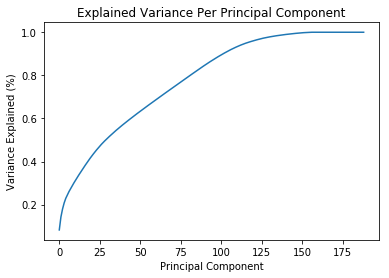

In [32]:
# Investigate the variance accounted for by each principal component.
def plot_pca(pca):
    vals = pca.explained_variance_ratio_
    cumvals = np.cumsum(vals)
    num_components = len(vals)
    ind = np.arange(num_components)

    plt.plot(ind, cumvals)
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

plot_pca(pca)


From the figure above, the number of components can be 150, such that it can capture most of variability of the dataset

In [33]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=150)
pca.fit(transformed_azdias)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca_transformed_azdias = pca.transform(transformed_azdias)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

- After applying the PCA with full number of features, we obtained and draw the accumulative values of the explained variance ratio. From the figure, we can take number of components from 150, as the cummulative sum of variance explained is close to 1.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [35]:
def explain_component(component_number, feature_names, pca, show_top=3):
    feature_weights = pca.components_[component_number - 1, :].tolist()
    sorted_feature_weights = sorted(zip(feature_weights, feature_names), reverse=True)
    print('Feature weights of component %d' % component_number)
    print("\n\tTop %d positive weights:" % show_top)
    for weight, name in sorted_feature_weights[:show_top]:
        print("%20s\t%f" % (name, weight))
    print("\n\tTop %d negative weights:" % show_top)
    for weight, name in sorted(sorted_feature_weights[-show_top:]):
        print("%20s\t%f" % (name, weight))

In [36]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
explain_component(1, azdias.columns, pca)


Feature weights of component 1

	Top 3 positive weights:
  LP_STATUS_GROB_1.0	0.192304
  HH_EINKOMMEN_SCORE	0.180725
              WEALTH	0.179924

	Top 3 negative weights:
          MOBI_REGIO	-0.201552
   FINANZ_MINIMALIST	-0.194795
         KBA05_ANTG1	-0.190060


In [37]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
explain_component(2, azdias.columns, pca)


Feature weights of component 2

	Top 3 positive weights:
ALTERSKATEGORIE_GROB	0.226853
    FINANZ_VORSORGER	0.205693
          ZABEOTYP_3	0.199096

	Top 3 negative weights:
              DECADE	-0.229061
           SEMIO_REL	-0.215461
       FINANZ_SPARER	-0.213310


In [38]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
explain_component(3, azdias.columns, pca)

Feature weights of component 3

	Top 3 positive weights:
          SEMIO_VERT	0.319916
           SEMIO_FAM	0.257918
           SEMIO_SOZ	0.255303

	Top 3 negative weights:
           ANREDE_KZ	-0.341359
          SEMIO_KAEM	-0.312348
           SEMIO_DOM	-0.279710


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

- For the first component:
    - Top 3 columns with highest positive weights are: LP_STATUS_GROB_1.0, HH_EINKOMMEN_SCORE, WEALTH
    - Top 3 columns with highest negative weights are: MOBI_REGIO, FINANZ_MINIMALIST, KBA05_ANTG1
    - Intepretation: Among the top 6 most influential attributes above, 4 of which reflects the income level of the sample including: LP_STATUS_GROB_1.0(low-income earner), HH_EINKOMMEN_SCORE(estimated household net income), WEALTH (a new attribute extracted from CAMEO_INTL_2015 - wealth/life stage typology), FINANZ_MINIMALIST(low-financial interest). Therefore, the first component may reflect the financial status of correponding sample.
- For the second component:
    - Top 3 columns with highest positive weights are: ALTERSKATEGORIE_GROB, FINANZ_VORSORGER, ZABEOTYP_3
    - Top 3 columns with highest negative weights are: DECADE, SEMIO_REL, FINANZ_SPARER
    - Intepretation: Among the top 6 most influential attributes, observations about one's financial behaviour can be deduced. Those attributes are: FINANZ_VORSORGER (describe financial topology to be prepared), ZABEOTYP_3 (energy consumption topology), SEMIO_REL (religious personality), FINANZ_SPARER (describes financial typology to be money-saver). In addition, other 2 attributes, DECADE and ALTERSKATEGORIE_GROB (estimated age based on name analysis) might also affect such behaviour because people of different age may behave differently in term of spending.
- For the third component:
    - Top 3 columns with highest positive weights are: SEMIO_VERT, SEMIO_FAM, SEMIO_SOZ
    - Top 3 columns with highest negative weights are: ANREDE_KZ, SEMIO_KAEM, SEMIO_DOM
    - Intepretaion: we can see that 5/6 attributes starts with SEMIO_, which describes the personality typology of the sample (if we look at top 10 instead of top 6, we can see more attributes like this show up). Hence, the third component may reflect dependence on the personality traits of the person

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [39]:
from sklearn.cluster import KMeans
import time
import pickle
import os

# Over a number of different cluster counts...
for n_cluster in range(2, 31):
    print("Number of clusters:", n_cluster)
    filename = "azdias_kmean_%d_clusters.sav" % n_cluster
    if os.path.exists(filename):
        continue
    start = time.time()

    # run k-means clustering on the data and...
    k_mean = KMeans(n_cluster).fit(pca_transformed_azdias)
    pickle.dump(k_mean, open(filename, 'wb'))
    
    # compute the average within-cluster distances.
    print('Execution time:', time.time() - start)
   

Number of clusters: 2
Number of clusters: 3
Number of clusters: 4
Number of clusters: 5
Number of clusters: 6
Number of clusters: 7
Number of clusters: 8
Number of clusters: 9
Number of clusters: 10
Number of clusters: 11
Number of clusters: 12
Number of clusters: 13
Number of clusters: 14
Number of clusters: 15
Number of clusters: 16
Number of clusters: 17
Number of clusters: 18
Number of clusters: 19
Number of clusters: 20
Number of clusters: 21
Number of clusters: 22
Number of clusters: 23
Number of clusters: 24
Number of clusters: 25
Number of clusters: 26
Number of clusters: 27
Number of clusters: 28
Number of clusters: 29
Number of clusters: 30


In [40]:
distance = []

# n_points = pca_transformed_azdias.shape[0]
# random_indices = np.random.choice(n_points, int(n_points * 0.2), replace=False)
# random_points = pca_transformed_azdias[random_indices]

for n_cluster in range(2, 31):
    filename = "azdias_kmean_%d_clusters.sav" % n_cluster
    loaded_model = pickle.load(open(filename, 'rb'))
    distance.append(-loaded_model.score(pca_transformed_azdias))

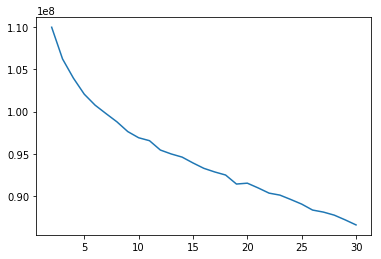

In [41]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(list(range(2, 31)), distance)


In [42]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
selected_n_cluster = 12
selected_kmean = KMeans(selected_n_cluster, random_state=42).fit(pca_transformed_azdias)
label_predictions = selected_kmean.predict(pca_transformed_azdias)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

- From the graph above, the selected number of clusters is 12. For number of cluster of cluster before 12, the change in score is more rapid and from 12, the line becomes more linear. We can consider this the "elbow"

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [43]:
# Load in the customer demographics data.
customer = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')
customer.shape

(191652, 85)

In [44]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
cleaned_customer, dropped_rows_count = clean_data(customer)
cleaned_customer.shape

(115643, 188)

In [45]:
missing_column_from_cleaned_azdias = [col for col in azdias.columns if col not in cleaned_customer.columns][0]
cleaned_customer['cleaned_customer'] = 0

In [46]:
# rescale the data
customer_scaler = StandardScaler()
fit_customer_scaler = customer_scaler.fit(cleaned_customer)
transformed_customer = fit_customer_scaler.transform(cleaned_customer)
transformed_customer.shape

(115643, 189)

In [47]:
# apply pca
# pca_customer = PCA()
# pca_customer.fit(transformed_customer)
# plot_pca(pca_customer)


We can also choose 150 for number of components as the cummulative variance presented by from 150 components is close to 1

In [48]:
# pca_customer = PCA(n_components=150)
# pca_customer.fit(transformed_customer)
# pca_transformed_customer = pca_customer.transform(transformed_customer)
# pca_transformed_customer.shape
pca_transformed_customer = pca.transform(transformed_customer)

In [49]:
customer_label_predictions = selected_kmean.predict(pca_transformed_customer)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [50]:
general_dataset_dropped = 891221 - 623209 # from the print out above
customer_dataset_dropped = dropped_rows_count
general_dataset_dropped, customer_dataset_dropped

(268012, 76009)

In [51]:
label_predictions.shape, customer_label_predictions.shape

((623209,), (115643,))

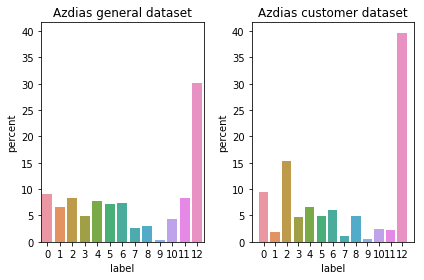

In [52]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

fig, (ax1, ax2) = plt.subplots(1,2)

# let the label for dropped data be 12
general_count_df = pd.DataFrame({'label': label_predictions}).append([{'label': 12}] * general_dataset_dropped)
customer_count_df = pd.DataFrame({'label': customer_label_predictions}).append([{'label': 12}] * customer_dataset_dropped)

sns.barplot(data=general_count_df, x='label', y="label", ax=ax1, estimator=lambda x: len(x) / len(general_count_df) * 100).set_title('Azdias general dataset')
ax1.set_ylabel('percent')
sns.barplot(data=customer_count_df, x='label', y="label", ax=ax2, estimator=lambda x: len(x) / len(customer_count_df) * 100).set_title('Azdias customer dataset')
ax2.set_ylabel('percent')

ax1.get_shared_y_axes().join(ax1, ax2)
ax2.autoscale()
fig.tight_layout()

Among 12 clusters:

- Clusters with about the same proportions: 0, 3, 9
- Clusters that are overrepresented in customer data: 2, 8
- Clusters that are underrepresented in customer data: 1, 4, 5, 6, 7, 10, 11

In [53]:
def extract_cluster(cluster_number, arr, label_arr):
    cluster_indices = np.where(label_arr == cluster_number)[0].tolist()
    return arr[cluster_indices, :]

def restore(transformed_arr, pca_obj, scaler_obj):
    reversed_pca_arr = pca_obj.inverse_transform(transformed_arr)
    return scaler_obj.inverse_transform(reversed_pca_arr)

def analyze_cluster(cluster_number, arr, label_arr, pca_obj, scaler_obj):
    cluster_arr = extract_cluster(cluster_number, arr, label_arr)
    restored_cluster_arr = restore(cluster_arr, pca_obj, scaler_obj)
    restored_cluster_df = pd.DataFrame(data=restored_cluster_arr, columns=cleaned_customer.columns)
    restored_cluster_description = restored_cluster_df.describe()
    for col in restored_cluster_description.columns:
        print("%22s %4.4f" % (col, restored_cluster_description.loc['mean', col]))
    return restored_cluster_description

In [59]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

overpresented_cluster = 2
analyze_cluster(overpresented_cluster, pca_transformed_customer, customer_label_predictions, pca, customer_scaler)

  ALTERSKATEGORIE_GROB 3.7233
             ANREDE_KZ 1.1873
     FINANZ_MINIMALIST 4.9341
         FINANZ_SPARER 1.0993
      FINANZ_VORSORGER 4.8532
        FINANZ_ANLEGER 1.1927
 FINANZ_UNAUFFAELLIGER 1.7309
      FINANZ_HAUSBAUER 2.1249
      GREEN_AVANTGARDE 0.9011
            HEALTH_TYP 1.7922
        RETOURTYP_BK_S 4.0093
             SEMIO_SOZ 4.6160
             SEMIO_FAM 3.8625
             SEMIO_REL 3.1596
             SEMIO_MAT 3.4010
            SEMIO_VERT 5.7555
            SEMIO_LUST 6.0068
             SEMIO_ERL 4.6006
            SEMIO_KULT 4.1215
             SEMIO_RAT 2.4720
            SEMIO_KRIT 3.3498
             SEMIO_DOM 3.6953
            SEMIO_KAEM 2.9744
         SEMIO_PFLICHT 2.6692
           SEMIO_TRADV 2.7744
               SOHO_KZ 0.0091
              VERS_TYP 1.4165
          ANZ_PERSONEN 2.7227
             ANZ_TITEL 0.0012
    HH_EINKOMMEN_SCORE 1.9020
        W_KEIT_KIND_HH 4.2087
        WOHNDAUER_2008 8.9313
   ANZ_HAUSHALTE_AKTIV 1.2547
          

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MAINSTREAM,WEALTH,LIFE_STAGE,cleaned_customer
count,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,...,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000
mean,3.723282,1.187260,4.934102,1.099326,4.853183,1.192747,1.730882,2.124882,0.901127,1.792233,...,0.008034,0.011005,0.013031,0.017766,0.014029,55.883428,0.017806,1.563095,3.242093,0.020093
std,0.368199,0.397928,0.277339,0.307811,0.390400,0.512753,0.740921,0.672261,0.187894,0.769910,...,0.037669,0.025516,0.024543,0.036057,0.027515,10.156065,0.109409,0.530257,0.577176,0.355888
min,1.568084,0.601573,2.719132,0.323454,1.403282,0.813092,0.713047,0.324820,-0.155301,0.933945,...,-0.091642,-0.163005,-0.173115,-0.267076,-0.215866,30.553879,-0.149525,1.104387,1.256231,-1.276107
25%,3.388127,0.946220,4.809778,0.947842,4.888728,0.984463,1.030713,1.969629,0.870539,0.995511,...,0.004761,0.003378,0.005838,0.007882,0.006275,50.674860,-0.019638,1.140694,2.976314,-0.156517
50%,3.798535,1.039986,5.013316,1.024278,4.980946,1.018538,1.956025,2.046176,0.878011,1.981960,...,0.010101,0.009145,0.011863,0.015563,0.012573,51.702079,0.008737,1.628332,3.123792,0.015487
75%,4.012866,1.152426,5.118984,1.102813,5.049616,1.062072,2.016121,2.166734,1.050803,2.024430,...,0.013908,0.013044,0.015925,0.021175,0.017054,60.842061,0.035789,1.649419,3.457091,0.156748
max,4.624266,2.299928,5.643731,3.792636,5.485263,4.977095,5.148214,5.584108,1.063669,3.091453,...,0.941526,0.869780,0.810911,0.825973,0.826235,96.897133,1.072252,4.544451,5.994106,1.742859


 Analyzing some attributes from original column list:
 
- Wealth/Income 
    - HH_EINKOMMEN_SCORE = 1.9020 -> very high income
    - WEALTH = 1.5631 -> prosperous to wealthy household

- Age/Life stage
    - LIFE_STAGE = 3.2421 -> family with school-aged children or more mature family
    - ALTERSKATEGORIE_GROB = 3.7233 -> indicates majoraity is 46-60 years old

- Financial mindset
    - FINANZ_MINIMALIST = 4.9341 -> very low financial interest
    - FINANZ_VORSORGER = 4.8532 -> very low in term of financially prepared
    - FINANZ_SPARER = 1.0993 -> very likely a money-saver

- Gender
    - ANREDE_KZ = 1.1873 -> close to 1, majority is male

- Personalty
    - SEMIO_FAM = 3.8625  -> average to high affinity in term of family-minded
    - SEMIO_SOZ = 4.6160  -> low to average affinity in term of socially-minded
    - SEMIO_KRIT = 3.3498 -> average to high critically minded

We can say that this cluster describes wealthy male customers at the mature life stage with careful financial mindset, a money-saver and familty-oriented personality

In [60]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

underpresented_cluster = 1
analyze_cluster(underpresented_cluster, pca_transformed_customer, customer_label_predictions, pca, customer_scaler)

  ALTERSKATEGORIE_GROB 2.6777
             ANREDE_KZ 1.0093
     FINANZ_MINIMALIST 3.3330
         FINANZ_SPARER 2.5473
      FINANZ_VORSORGER 3.2441
        FINANZ_ANLEGER 2.1317
 FINANZ_UNAUFFAELLIGER 2.6366
      FINANZ_HAUSBAUER 2.5916
      GREEN_AVANTGARDE 0.2964
            HEALTH_TYP 2.4265
        RETOURTYP_BK_S 3.6057
             SEMIO_SOZ 6.0025
             SEMIO_FAM 6.0169
             SEMIO_REL 5.2487
             SEMIO_MAT 4.5703
            SEMIO_VERT 6.0051
            SEMIO_LUST 3.8629
             SEMIO_ERL 2.8219
            SEMIO_KULT 6.0588
             SEMIO_RAT 3.6515
            SEMIO_KRIT 2.9831
             SEMIO_DOM 3.1410
            SEMIO_KAEM 2.6038
         SEMIO_PFLICHT 4.7990
           SEMIO_TRADV 4.0807
               SOHO_KZ 0.0086
              VERS_TYP 1.6527
          ANZ_PERSONEN 2.1321
             ANZ_TITEL 0.0142
    HH_EINKOMMEN_SCORE 4.3863
        W_KEIT_KIND_HH 3.8610
        WOHNDAUER_2008 7.8933
   ANZ_HAUSHALTE_AKTIV 9.4377
          

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MAINSTREAM,WEALTH,LIFE_STAGE,cleaned_customer
count,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,...,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,2.677691,1.009312,3.332992,2.547280,3.244135,2.131703,2.636578,2.591595,0.296442,2.426499,...,0.010772,0.015380,0.010335,0.006226,-0.021093,73.751120,0.647706,3.269585,3.796933,-0.002370
std,0.685805,0.087497,1.091644,0.997815,1.223225,1.090718,1.272558,1.211748,0.392873,0.780135,...,0.133881,0.167728,0.157331,0.175467,0.084928,12.108775,0.473402,1.108732,0.740135,0.615677
min,1.345207,0.666113,0.442043,0.562152,0.035923,0.785704,0.737543,0.036060,-0.174860,0.937181,...,-0.094722,-0.167031,-0.180280,-0.272553,-0.220545,30.707901,-0.084970,1.103889,1.341882,-1.271586
25%,2.079064,0.952672,2.717454,1.866972,2.226870,1.107806,1.885414,1.904340,0.011677,2.011617,...,-0.025668,-0.021965,-0.024975,-0.032777,-0.031740,68.881386,0.080682,2.621595,3.317247,-0.461532
50%,2.913231,1.012705,3.352628,2.475906,3.516740,2.037685,2.839033,2.377408,0.208619,3.001914,...,0.000186,-0.008615,-0.008798,-0.010844,-0.011558,77.032040,0.986241,3.517431,3.472084,0.004915
75%,3.189786,1.069915,4.150774,3.247065,3.980433,2.985378,3.126201,3.215511,0.526053,3.020297,...,0.008968,0.001780,0.003710,0.005754,0.002313,80.178148,1.037295,4.073221,4.275423,0.429235
max,4.485767,1.289294,5.546419,5.132447,5.437683,5.296527,5.265916,5.683446,1.063845,3.084244,...,0.938639,0.869102,0.811127,0.825340,0.826678,97.019186,1.226116,4.599651,6.079874,1.822326


 Analyzing some attributes from original column list:
 
- Wealth/Income 
    - HH_EINKOMMEN_SCORE = 4.3863 -> average to lower income level
    - WEALTH = 3.2696 -> comforatable to less affluent household

- Age/Life stage
    - LIFE_STAGE = 3.7969 -> family with school-aged children or more mature family
    - ALTERSKATEGORIE_GROB = 2.6777 -> indicates majoraity is 30-60 years old

- Financial mindset
    - FINANZ_MINIMALIST = 3.3330 -> low to average financial interest
    - FINANZ_VORSORGER = 3.2441 -> average in term of financially prepared
    - FINANZ_SPARER = 2.5473 -> average to hign chance to be a money saver

- Gender
    - ANREDE_KZ = 1.0093 -> close to 1, majority is male

- Personalty
    - SEMIO_FAM = 6.0169  -> very low affinity in term of family-minded
    - SEMIO_SOZ = 6.0025  -> very low affinity in term of socially-minded
    - SEMIO_KRIT = 2.9831 -> highly critically minded

We can say that this cluster describes average-income male customers at the middle age life stage with more open financial mindset than previous cluster with critical and self-centered personality

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

From above analysis, the target customer of the mail-order company might be the high-income ones at mature life stage with family-minded mindset. On the opposite, the unpopular aim of the company is less comfortable in term of finance income at the middle age life stage and less socially or familly minded


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.